Copyright 2020 DeepMind Technologies Limited.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Open X-Embodiment Datasets

![](https://robotics-transformer-x.github.io/img/overview.png)

This colab helps you **visualize** the datasets in the Open X-Embodiment Dataset, explains how to **download** them and how to **train** with them.

Table of Content:

>[Open X-Embodiment Datasets](#scrollTo=EnWCKLGGaf-d)

>[Visualize Datasets](#scrollTo=29c7oLlJbWwF)

>[Download Datasets](#scrollTo=-WHN-2OrKqGo)

>[Data Loader Example](#scrollTo=IyccDsRqwtMz)

>[Interleave Multiple Datasets](#scrollTo=ekmsGRAnw3Bp)

>[Example Dataloader to produce trajectories](#scrollTo=aew258oUbamg)

>>[Demonstration of transformation from an episode to a trajectory](#scrollTo=BK4RRYkbLN5B)

>>[Combination of multiple datasets](#scrollTo=Oy89HzymQyAq)

>[Available datasets:](#scrollTo=N2Efw2aHVfSX)



# Visualize Datasets

In [1]:
import numpy as np
import tensorflow_datasets as tfds
from PIL import Image
from IPython import display

DATASETS = [
    'fractal20220817_data',
    'kuka',
    'bridge',
    'taco_play',
    'jaco_play',
    'berkeley_cable_routing',
    'roboturk',
    'nyu_door_opening_surprising_effectiveness',
    'viola',
    'berkeley_autolab_ur5',
    'toto',
    'language_table',
    'columbia_cairlab_pusht_real',
    'stanford_kuka_multimodal_dataset_converted_externally_to_rlds',
    'nyu_rot_dataset_converted_externally_to_rlds',
    'stanford_hydra_dataset_converted_externally_to_rlds',
    'austin_buds_dataset_converted_externally_to_rlds',
    'nyu_franka_play_dataset_converted_externally_to_rlds',
    'maniskill_dataset_converted_externally_to_rlds',
    'cmu_franka_exploration_dataset_converted_externally_to_rlds',
    'ucsd_kitchen_dataset_converted_externally_to_rlds',
    'ucsd_pick_and_place_dataset_converted_externally_to_rlds',
    'austin_sailor_dataset_converted_externally_to_rlds',
    'austin_sirius_dataset_converted_externally_to_rlds',
    'bc_z',
    'usc_cloth_sim_converted_externally_to_rlds',
    'utokyo_pr2_opening_fridge_converted_externally_to_rlds',
    'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds',
    'utokyo_saytap_converted_externally_to_rlds',
    'utokyo_xarm_pick_and_place_converted_externally_to_rlds',
    'utokyo_xarm_bimanual_converted_externally_to_rlds',
    'robo_net',
    'berkeley_mvp_converted_externally_to_rlds',
    'berkeley_rpt_converted_externally_to_rlds',
    'kaist_nonprehensile_converted_externally_to_rlds',
    'stanford_mask_vit_converted_externally_to_rlds',
    'tokyo_u_lsmo_converted_externally_to_rlds',
    'dlr_sara_pour_converted_externally_to_rlds',
    'dlr_sara_grid_clamp_converted_externally_to_rlds',
    'dlr_edan_shared_control_converted_externally_to_rlds',
    'asu_table_top_converted_externally_to_rlds',
    'stanford_robocook_converted_externally_to_rlds',
    'eth_agent_affordances',
    'imperialcollege_sawyer_wrist_cam',
    'iamlab_cmu_pickup_insert_converted_externally_to_rlds',
    'uiuc_d3field',
    'utaustin_mutex',
    'berkeley_fanuc_manipulation',
    'cmu_play_fusion',
    'cmu_stretch',
    'berkeley_gnm_recon',
    'berkeley_gnm_cory_hall',
    'berkeley_gnm_sac_son'
]


def dataset2path(dataset_name):
  if dataset_name == 'robo_net':
    version = '1.0.0'
  elif dataset_name == 'language_table':
    version = '0.0.1'
  else:
    version = '0.1.0'
  return f'gs://gresearch/robotics/{dataset_name}/{version}'


def as_gif(images, path='temp.gif'):
  # Render the images as the gif:
  images[0].save(path, save_all=True, append_images=images[1:], duration=1000, loop=0)
  gif_bytes = open(path,'rb').read()
  return gif_bytes

In [2]:
!pip install numpy==1.25.2

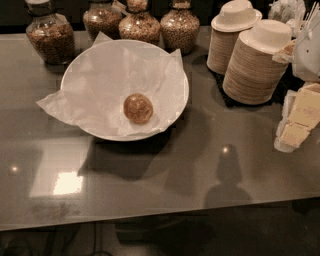

In [3]:
# choose the dataset path in the dropdown on the right and rerun this cell
# to see multiple samples

dataset = 'fractal20220817_data' # @param ['fractal20220817_data', 'kuka', 'bridge', 'taco_play', 'jaco_play', 'berkeley_cable_routing', 'roboturk', 'nyu_door_opening_surprising_effectiveness', 'viola', 'berkeley_autolab_ur5', 'toto', 'language_table', 'columbia_cairlab_pusht_real', 'stanford_kuka_multimodal_dataset_converted_externally_to_rlds', 'nyu_rot_dataset_converted_externally_to_rlds', 'stanford_hydra_dataset_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'nyu_franka_play_dataset_converted_externally_to_rlds', 'maniskill_dataset_converted_externally_to_rlds', 'furniture_bench_dataset_converted_externally_to_rlds', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'ucsd_kitchen_dataset_converted_externally_to_rlds', 'ucsd_pick_and_place_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'usc_cloth_sim_converted_externally_to_rlds', 'utokyo_pr2_opening_fridge_converted_externally_to_rlds', 'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds', 'utokyo_saytap_converted_externally_to_rlds', 'utokyo_xarm_pick_and_place_converted_externally_to_rlds', 'utokyo_xarm_bimanual_converted_externally_to_rlds', 'robo_net', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'kaist_nonprehensile_converted_externally_to_rlds', 'stanford_mask_vit_converted_externally_to_rlds', 'tokyo_u_lsmo_converted_externally_to_rlds', 'dlr_sara_pour_converted_externally_to_rlds', 'dlr_sara_grid_clamp_converted_externally_to_rlds', 'dlr_edan_shared_control_converted_externally_to_rlds', 'asu_table_top_converted_externally_to_rlds', 'stanford_robocook_converted_externally_to_rlds', 'eth_agent_affordances', 'imperialcollege_sawyer_wrist_cam', 'iamlab_cmu_pickup_insert_converted_externally_to_rlds', 'uiuc_d3field', 'utaustin_mutex', 'berkeley_fanuc_manipulation', 'cmu_food_manipulation', 'cmu_play_fusion', 'cmu_stretch', 'berkeley_gnm_recon', 'berkeley_gnm_cory_hall', 'berkeley_gnm_sac_son']
display_key = 'image'

b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
if display_key not in b.info.features['steps']['observation']:
  raise ValueError(
      f"The key {display_key} was not found in this dataset.\n"
      + "Please choose a different image key to display for this dataset.\n"
      + "Here is the observation spec:\n"
      + str(b.info.features['steps']['observation']))

ds = b.as_dataset(split='train[:10]').shuffle(10)   # take only first 10 episodes
episode = next(iter(ds))
images = [step['observation'][display_key] for step in episode['steps']]
images = [Image.fromarray(image.numpy()) for image in images]
display.Image(as_gif(images))

In [4]:
# other elements of the episode step --> this may vary for each dataset
for elem in next(iter(episode['steps'])).items():
  print(elem)

('action', {'base_displacement_vector': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>, 'base_displacement_vertical_rotation': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, 'gripper_closedness_action': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, 'rotation_delta': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.06159072, 0.00688609, 0.03579884], dtype=float32)>, 'terminate_episode': <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 0], dtype=int32)>, 'world_vector': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.01115293,  0.02142607, -0.01158211], dtype=float32)>})
('is_first', <tf.Tensor: shape=(), dtype=bool, numpy=True>)
('is_last', <tf.Tensor: shape=(), dtype=bool, numpy=False>)
('is_terminal', <tf.Tensor: shape=(), dtype=bool, numpy=False>)
('observation', {'base_pose_tool_reached': <tf.Tensor: shape=(7,), dtype=float32, numpy=
array([ 0.43813595, -0.21666576,  0.9761212 , -

# Download Datasets

All datasets can be downloaded simply via `tfds.load(<dataset_name>)`.
Below we provide a script that downloads all datasets into `~/tensorflow_datasets` on your local machine. Simply copy the code and run it on your local machine to download the full dataset (XXX TB).

If you want to filter the dataset before download, please refer to
[this Google Sheet](https://docs.google.com/spreadsheets/d/1rPBD77tk60AEIGZrGSODwyyzs5FgCU9Uz3h-3_t2A9g/edit?usp=sharing). It allows you
to filter the data by attributes like robot model, number of cameras, type of tasks etc. You can then download only the filtered datasets by pasting the
dataset list from the spreadsheet into the code below.

The download code will automatically skip any datasets you have previously downloaded.

In [5]:
!pip install tfds-nightly   # to get most up-to-date registered datasets
!pip install apache_beam

warning: the below cell serves as an example how to download the datasets to your local directory. It usually takes a long time to run and require a relatively large disk size available, you could skip it or end it if you don't need to download the datasets. To speedup, please have a look at the instructions to setup distributed generation:
https://www.tensorflow.org/datasets/beam_datasets#generating_a_beam_dataset

In [6]:

import tensorflow_datasets as tfds
import tqdm
import os

# Dataset isimleri
DATASET_NAMES = ['fractal20220817_data', 'kuka', 'bridge', 'taco_play', 'jaco_play', 'berkeley_cable_routing', 'roboturk', 'nyu_door_opening_surprising_effectiveness', 'viola', 'berkeley_autolab_ur5', 'toto', 'language_table', 'columbia_cairlab_pusht_real', 'stanford_kuka_multimodal_dataset_converted_externally_to_rlds', 'nyu_rot_dataset_converted_externally_to_rlds', 'stanford_hydra_dataset_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'nyu_franka_play_dataset_converted_externally_to_rlds', 'maniskill_dataset_converted_externally_to_rlds', 'furniture_bench_dataset_converted_externally_to_rlds', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'ucsd_kitchen_dataset_converted_externally_to_rlds', 'ucsd_pick_and_place_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'usc_cloth_sim_converted_externally_to_rlds', 'utokyo_pr2_opening_fridge_converted_externally_to_rlds', 'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds', 'utokyo_saytap_converted_externally_to_rlds', 'utokyo_xarm_pick_and_place_converted_externally_to_rlds', 'utokyo_xarm_bimanual_converted_externally_to_rlds', 'robo_net', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'kaist_nonprehensile_converted_externally_to_rlds', 'stanford_mask_vit_converted_externally_to_rlds', 'tokyo_u_lsmo_converted_externally_to_rlds', 'dlr_sara_pour_converted_externally_to_rlds', 'dlr_sara_grid_clamp_converted_externally_to_rlds', 'dlr_edan_shared_control_converted_externally_to_rlds', 'asu_table_top_converted_externally_to_rlds', 'stanford_robocook_converted_externally_to_rlds', 'eth_agent_affordances', 'imperialcollege_sawyer_wrist_cam', 'iamlab_cmu_pickup_insert_converted_externally_to_rlds', 'uiuc_d3field', 'utaustin_mutex', 'berkeley_fanuc_manipulation', 'cmu_food_manipulation', 'cmu_play_fusion', 'cmu_stretch', 'berkeley_gnm_recon', 'berkeley_gnm_cory_hall', 'berkeley_gnm_sac_son']

# Dosya yolu genişletme
DOWNLOAD_DIR = os.path.expanduser('~/tensorflow_datasets')

print(f"Downloading {len(DATASET_NAMES)} datasets to {DOWNLOAD_DIR}.")

# İndirme işlemini güvenli şekilde yap
for dataset_name in tqdm.tqdm(DATASET_NAMES):
    try:
        _ = tfds.load(dataset_name, data_dir=DOWNLOAD_DIR)
    except Exception as e:
        print(f"Failed to load dataset {dataset_name}: {e}")



  0%|          | 0/55 [00:00<?, ?it/s]WARNING:absl:Variant folder /root/tensorflow_datasets/fractal20220817_data/0.1.0 has no dataset_info.json


  2%|▏         | 1/55 [00:02<01:53,  2.10s/it]

Failed to load dataset fractal20220817_data: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f408019c60>): maximum recursion depth exceeded


  4%|▎         | 2/55 [00:02<01:08,  1.29s/it]

Failed to load dataset kuka: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2d260>): maximum recursion depth exceeded


  5%|▌         | 3/55 [00:03<00:59,  1.14s/it]

Failed to load dataset bridge: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2dee0>): maximum recursion depth exceeded


  7%|▋         | 4/55 [00:04<00:57,  1.13s/it]

Failed to load dataset taco_play: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2e3e0>): maximum recursion depth exceeded


  9%|▉         | 5/55 [00:06<01:00,  1.22s/it]

Failed to load dataset jaco_play: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2f2e0>): maximum recursion depth exceeded


 11%|█         | 6/55 [00:07<01:03,  1.29s/it]

Failed to load dataset berkeley_cable_routing: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2f420>): maximum recursion depth exceeded


 13%|█▎        | 7/55 [00:09<01:06,  1.39s/it]

Failed to load dataset roboturk: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fda2fce0>): maximum recursion depth exceeded


 15%|█▍        | 8/55 [00:10<01:04,  1.37s/it]

Failed to load dataset nyu_door_opening_surprising_effectiveness: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8cc040>): maximum recursion depth exceeded


 16%|█▋        | 9/55 [00:11<01:00,  1.31s/it]

Failed to load dataset viola: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8ce3e0>): maximum recursion depth exceeded


 18%|█▊        | 10/55 [00:12<00:57,  1.27s/it]

Failed to load dataset berkeley_autolab_ur5: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8cc220>): maximum recursion depth exceeded


 20%|██        | 11/55 [00:14<00:53,  1.21s/it]

Failed to load dataset toto: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8cfa60>): maximum recursion depth exceeded
Failed to load dataset language_table: Dataset language_table not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_rlds
	- bair_robot_pushing_small
	- bc_z
	- bccd
	- beans
	- bee_dataset
	- beir
	- berkeley_autolab_ur5
	- berkeley_ca

 24%|██▎       | 13/55 [00:15<00:38,  1.10it/s]

Failed to load dataset columbia_cairlab_pusht_real: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd965120>): maximum recursion depth exceeded


 25%|██▌       | 14/55 [00:16<00:43,  1.07s/it]

Failed to load dataset stanford_kuka_multimodal_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8ce980>): maximum recursion depth exceeded


 27%|██▋       | 15/55 [00:18<00:45,  1.14s/it]

Failed to load dataset nyu_rot_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd965b20>): maximum recursion depth exceeded


 29%|██▉       | 16/55 [00:19<00:43,  1.12s/it]

Failed to load dataset stanford_hydra_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd965b20>): maximum recursion depth exceeded


 31%|███       | 17/55 [00:20<00:41,  1.10s/it]

Failed to load dataset austin_buds_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd967a60>): maximum recursion depth exceeded


 33%|███▎      | 18/55 [00:21<00:39,  1.07s/it]

Failed to load dataset nyu_franka_play_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd966d40>): maximum recursion depth exceeded


 35%|███▍      | 19/55 [00:22<00:42,  1.19s/it]

Failed to load dataset maniskill_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8f65c0>): maximum recursion depth exceeded
Failed to load dataset furniture_bench_dataset_converted_externally_to_rlds: Dataset furniture_bench_dataset_converted_externally_to_rlds not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_r

 38%|███▊      | 21/55 [00:23<00:28,  1.18it/s]

Failed to load dataset cmu_franka_exploration_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8f74c0>): maximum recursion depth exceeded


 40%|████      | 22/55 [00:24<00:28,  1.17it/s]

Failed to load dataset ucsd_kitchen_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8f6ac0>): maximum recursion depth exceeded


 42%|████▏     | 23/55 [00:25<00:28,  1.14it/s]

Failed to load dataset ucsd_pick_and_place_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8f68e0>): maximum recursion depth exceeded


 44%|████▎     | 24/55 [00:26<00:27,  1.13it/s]

Failed to load dataset austin_sailor_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8f7060>): maximum recursion depth exceeded


 45%|████▌     | 25/55 [00:27<00:26,  1.12it/s]

Failed to load dataset austin_sirius_dataset_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd849620>): maximum recursion depth exceeded


 47%|████▋     | 26/55 [00:27<00:24,  1.18it/s]

Failed to load dataset bc_z: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8485e0>): maximum recursion depth exceeded


 49%|████▉     | 27/55 [00:28<00:23,  1.17it/s]

Failed to load dataset usc_cloth_sim_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd848f40>): maximum recursion depth exceeded


 51%|█████     | 28/55 [00:29<00:23,  1.16it/s]

Failed to load dataset utokyo_pr2_opening_fridge_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd84ade0>): maximum recursion depth exceeded


 53%|█████▎    | 29/55 [00:30<00:22,  1.16it/s]

Failed to load dataset utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd874360>): maximum recursion depth exceeded


 55%|█████▍    | 30/55 [00:31<00:21,  1.17it/s]

Failed to load dataset utokyo_saytap_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd875a80>): maximum recursion depth exceeded


 56%|█████▋    | 31/55 [00:32<00:20,  1.16it/s]

Failed to load dataset utokyo_xarm_pick_and_place_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd8758a0>): maximum recursion depth exceeded


 58%|█████▊    | 32/55 [00:33<00:20,  1.12it/s]

Failed to load dataset utokyo_xarm_bimanual_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd875580>): maximum recursion depth exceeded
Failed to load dataset robo_net: Dataset robo_net not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_rlds
	- bair_robot_pushing_small
	- bc_z
	- bccd
	- beans
	- bee_dataset
	- beir
	- be

 62%|██████▏   | 34/55 [00:34<00:15,  1.39it/s]

Failed to load dataset berkeley_mvp_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f3fd84b7e0>): maximum recursion depth exceeded


 64%|██████▎   | 35/55 [00:35<00:16,  1.23it/s]

Failed to load dataset berkeley_rpt_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404dc1580>): maximum recursion depth exceeded


 65%|██████▌   | 36/55 [00:36<00:16,  1.15it/s]

Failed to load dataset kaist_nonprehensile_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404dc1940>): maximum recursion depth exceeded


 67%|██████▋   | 37/55 [00:37<00:17,  1.00it/s]

Failed to load dataset stanford_mask_vit_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404dc2de0>): maximum recursion depth exceeded


 69%|██████▉   | 38/55 [00:38<00:16,  1.04it/s]

Failed to load dataset tokyo_u_lsmo_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404dc3c40>): maximum recursion depth exceeded


 71%|███████   | 39/55 [00:39<00:14,  1.07it/s]

Failed to load dataset dlr_sara_pour_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e00b80>): maximum recursion depth exceeded


 73%|███████▎  | 40/55 [00:40<00:13,  1.10it/s]

Failed to load dataset dlr_sara_grid_clamp_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e02160>): maximum recursion depth exceeded


 75%|███████▍  | 41/55 [00:41<00:12,  1.10it/s]

Failed to load dataset dlr_edan_shared_control_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e01940>): maximum recursion depth exceeded


 76%|███████▋  | 42/55 [00:42<00:11,  1.09it/s]

Failed to load dataset asu_table_top_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e023e0>): maximum recursion depth exceeded


 78%|███████▊  | 43/55 [00:43<00:11,  1.06it/s]

Failed to load dataset stanford_robocook_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e03e20>): maximum recursion depth exceeded


 80%|████████  | 44/55 [00:44<00:10,  1.09it/s]

Failed to load dataset eth_agent_affordances: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e556c0>): maximum recursion depth exceeded


 82%|████████▏ | 45/55 [00:44<00:09,  1.10it/s]

Failed to load dataset imperialcollege_sawyer_wrist_cam: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e55a80>): maximum recursion depth exceeded


 84%|████████▎ | 46/55 [00:45<00:08,  1.11it/s]

Failed to load dataset iamlab_cmu_pickup_insert_converted_externally_to_rlds: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e54c20>): maximum recursion depth exceeded


 85%|████████▌ | 47/55 [00:46<00:07,  1.11it/s]

Failed to load dataset uiuc_d3field: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e57880>): maximum recursion depth exceeded


 87%|████████▋ | 48/55 [00:47<00:06,  1.07it/s]

Failed to load dataset utaustin_mutex: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404e57880>): maximum recursion depth exceeded


 89%|████████▉ | 49/55 [00:48<00:05,  1.03it/s]

Failed to load dataset berkeley_fanuc_manipulation: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404cf14e0>): maximum recursion depth exceeded
Failed to load dataset cmu_food_manipulation: Dataset cmu_food_manipulation not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- ai2dcaption
	- aloha_mobile
	- amazon_us_reviews
	- anli
	- answer_equivalence
	- arc
	- asimov_dilemmas_auto_val
	- asimov_dilemmas_scifi_train
	- asimov_dilemmas_scifi_val
	- asimov_injury_val
	- asimov_multimodal_auto_val
	- asimov_multimodal_manual_val
	- asqa
	- asset
	- assin2
	- asu_table_top_converted_externally_to_rlds
	- austin_buds_dataset_converted_externally_to_rlds
	- austin_sailor_dataset_converted_externally_to_rlds
	- austin_sirius_dataset_converted_externally_to_rlds
	- bair_robot_pushing_small
	- bc_z
	- bccd
	- beans
	- bee_dataset
	- beir
	

 93%|█████████▎| 51/55 [00:49<00:03,  1.30it/s]

Failed to load dataset cmu_play_fusion: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404cf1a80>): maximum recursion depth exceeded


 95%|█████████▍| 52/55 [00:50<00:02,  1.20it/s]

Failed to load dataset cmu_stretch: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404cf2480>): maximum recursion depth exceeded


 96%|█████████▋| 53/55 [00:51<00:01,  1.10it/s]

Failed to load dataset berkeley_gnm_recon: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404cf31a0>): maximum recursion depth exceeded


 98%|█████████▊| 54/55 [00:53<00:00,  1.05it/s]

Failed to load dataset berkeley_gnm_cory_hall: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404d54540>): maximum recursion depth exceeded


100%|██████████| 55/55 [00:54<00:00,  1.02it/s]

Failed to load dataset berkeley_gnm_sac_son: Unable to pickle fn CallableWrapperDoFn(<function DatasetImporterBuilder._generate_examples.<locals>.converter_fn at 0x78f404d56020>): maximum recursion depth exceeded


# Data Loader Example

Below, we demonstrate a simple example of how to load the dataset into training batches, where each sample in the batch only contains one step.

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

# load raw dataset --> replace this with tfds.load(<dataset_name>) on your
# local machine!
dataset = 'kuka'
b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
ds = b.as_dataset(split='train[:10]')

def episode2steps(episode):
  return episode['steps']

def step_map_fn(step):
  return {
      'observation': {
          'image': tf.image.resize(step['observation']['image'], (128, 128)),
      },
      'action': tf.concat([
          step['action']['world_vector'],
          step['action']['rotation_delta'],
          step['action']['gripper_closedness_action'],
      ], axis=-1)
  }

# convert RLDS episode dataset to individual steps & reformat
ds = ds.map(
    episode2steps, num_parallel_calls=tf.data.AUTOTUNE).flat_map(lambda x: x)
ds = ds.map(step_map_fn, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle, repeat, pre-fetch, batch
ds = ds.cache()         # optionally keep full dataset in memory
ds = ds.shuffle(100)    # set shuffle buffer size
ds = ds.repeat()        # ensure that data never runs out

In [8]:
import tqdm

for i, batch in tqdm.tqdm(
    enumerate(ds.prefetch(3).batch(4).as_numpy_iterator())):
  # here you would add your Jax / PyTorch training code
  if i == 10000: break

10000it [00:11, 844.65it/s]


# Interleave Multiple Datasets


In [9]:
# Load second dataset --> replace this with tfds.load(<dataset_name>) on your
# local machine!
dataset = 'utaustin_mutex'
b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
ds2 = b.as_dataset(split='train[:10]')

def step_map_fn_mutex(step):
  # reformat to align specs of both datasets
  return {
      'observation': {
          'image': tf.image.resize(step['observation']['image'], (128, 128)),
      },
      'action': step['action'],
  }

ds2 = ds2.map(
    episode2steps, num_parallel_calls=tf.data.AUTOTUNE).flat_map(lambda x: x)
ds2 = ds2.map(step_map_fn_mutex, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle, repeat, pre-fetch, batch
ds2 = ds2.cache()         # optionally keep full dataset in memory
ds2 = ds2.shuffle(100)    # set shuffle buffer size
ds2 = ds2.repeat()        # ensure that data never runs out

In [10]:
# interleave datasets w/ equal sampling weight
ds_combined = tf.data.Dataset.sample_from_datasets([ds, ds2], [0.5, 0.5])

In [11]:
import tqdm

for i, batch in tqdm.tqdm(
    enumerate(ds_combined.prefetch(3).batch(4).as_numpy_iterator())):
  # here you would add your Jax / PyTorch training code
  if i == 10000: break

10000it [00:18, 550.39it/s]


# Example Dataloader to produce trajectories

When training transformers, we usually use trajectories of fix-length as input into the transformers. This is to enable the transformer to condition on a fixed window of history when predicting actions.

Below we demonstrate how one can load the TFDS datasets, transform the episodes
into fixed-length "trajectories" and mix multiple datasets by aligning their specs.

In [12]:
!pip install rlds[tensorflow]

In [13]:
!pip install dm-reverb[tensorflow]

In [14]:
from typing import Any, Dict, Union, NamedTuple

import numpy as np
import tensorflow_datasets as tfds
import rlds
import reverb
from rlds import transformations
import tensorflow_datasets as tfds
import tree

import abc
import dataclasses
from typing import Dict, Optional

from rlds import rlds_types
import tensorflow as tf
from PIL import Image
from IPython import display

In [15]:
# @title Transformation definitions

def _features_to_tensor_spec(
    feature: tfds.features.FeatureConnector
) -> tf.TensorSpec:
  """Converts a tfds Feature into a TensorSpec."""

  def _get_feature_spec(nested_feature: tfds.features.FeatureConnector):
    if isinstance(nested_feature, tf.DType):
      return tf.TensorSpec(shape=(), dtype=nested_feature)
    else:
      return nested_feature.get_tensor_spec()

  # FeaturesDict can sometimes be a plain dictionary, so we use tf.nest to
  # make sure we deal with the nested structure.
  return tf.nest.map_structure(_get_feature_spec, feature)


def _encoded_feature(feature: Optional[tfds.features.FeatureConnector],
                     image_encoding: Optional[str],
                     tensor_encoding: Optional[tfds.features.Encoding]):
  """Adds encoding to Images and/or Tensors."""
  def _apply_encoding(feature: tfds.features.FeatureConnector,
                      image_encoding: Optional[str],
                      tensor_encoding: Optional[tfds.features.Encoding]):
    if image_encoding and isinstance(feature, tfds.features.Image):
      return tfds.features.Image(
          shape=feature.shape,
          dtype=feature.dtype,
          use_colormap=feature.use_colormap,
          encoding_format=image_encoding)
    if tensor_encoding and isinstance(
        feature, tfds.features.Tensor) and feature.dtype != tf.string:
      return tfds.features.Tensor(
          shape=feature.shape, dtype=feature.dtype, encoding=tensor_encoding)
    return feature

  if not feature:
    return None
  return tf.nest.map_structure(
      lambda x: _apply_encoding(x, image_encoding, tensor_encoding), feature)


@dataclasses.dataclass
class RLDSSpec(metaclass=abc.ABCMeta):
  """Specification of an RLDS Dataset.

  It is used to hold a spec that can be converted into a TFDS DatasetInfo or
  a `tf.data.Dataset` spec.
  """
  observation_info: Optional[tfds.features.FeatureConnector] = None
  action_info: Optional[tfds.features.FeatureConnector] = None
  reward_info: Optional[tfds.features.FeatureConnector] = None
  discount_info: Optional[tfds.features.FeatureConnector] = None
  step_metadata_info: Optional[tfds.features.FeaturesDict] = None
  episode_metadata_info: Optional[tfds.features.FeaturesDict] = None

  def step_tensor_spec(self) -> Dict[str, tf.TensorSpec]:
    """Obtains the TensorSpec of an RLDS step."""
    step = {}
    if self.observation_info:
      step[rlds_types.OBSERVATION] = _features_to_tensor_spec(
          self.observation_info)
    if self.action_info:
      step[rlds_types.ACTION] = _features_to_tensor_spec(
          self.action_info)
    if self.discount_info:
      step[rlds_types.DISCOUNT] = _features_to_tensor_spec(
          self.discount_info)
    if self.reward_info:
      step[rlds_types.REWARD] = _features_to_tensor_spec(
          self.reward_info)
    if self.step_metadata_info:
      for k, v in self.step_metadata_info.items():
        step[k] = _features_to_tensor_spec(v)

    step[rlds_types.IS_FIRST] = tf.TensorSpec(shape=(), dtype=bool)
    step[rlds_types.IS_LAST] = tf.TensorSpec(shape=(), dtype=bool)
    step[rlds_types.IS_TERMINAL] = tf.TensorSpec(shape=(), dtype=bool)
    return step

  def episode_tensor_spec(self) -> Dict[str, tf.TensorSpec]:
    """Obtains the TensorSpec of an RLDS step."""
    episode = {}
    episode[rlds_types.STEPS] = tf.data.DatasetSpec(
        element_spec=self.step_tensor_spec())
    if self.episode_metadata_info:
      for k, v in self.episode_metadata_info.items():
        episode[k] = _features_to_tensor_spec(v)
    return episode

  def to_dataset_config(
      self,
      name: str,
      image_encoding: Optional[str] = None,
      tensor_encoding: Optional[tfds.features.Encoding] = None,
      citation: Optional[str] = None,
      homepage: Optional[str] = None,
      description: Optional[str] = None,
      overall_description: Optional[str] = None,
  ) -> tfds.rlds.rlds_base.DatasetConfig:
    """Obtains the DatasetConfig for TFDS from the Spec."""
    return tfds.rlds.rlds_base.DatasetConfig(
        name=name,
        description=description,
        overall_description=overall_description,
        homepage=homepage,
        citation=citation,
        observation_info=_encoded_feature(self.observation_info, image_encoding,
                                          tensor_encoding),
        action_info=_encoded_feature(self.action_info, image_encoding,
                                     tensor_encoding),
        reward_info=_encoded_feature(self.reward_info, image_encoding,
                                     tensor_encoding),
        discount_info=_encoded_feature(self.discount_info, image_encoding,
                                       tensor_encoding),
        step_metadata_info=_encoded_feature(self.step_metadata_info,
                                            image_encoding, tensor_encoding),
        episode_metadata_info=_encoded_feature(self.episode_metadata_info,
                                               image_encoding, tensor_encoding))

  def to_features_dict(self):
    """Returns a TFDS FeaturesDict representing the dataset config."""
    step_config = {
        rlds_types.IS_FIRST: tf.bool,
        rlds_types.IS_LAST: tf.bool,
        rlds_types.IS_TERMINAL: tf.bool,
    }

    if self.observation_info:
      step_config[rlds_types.OBSERVATION] = self.observation_info
    if self.action_info:
      step_config[rlds_types.ACTION] = self.action_info
    if self.discount_info:
      step_config[rlds_types.DISCOUNT] = self.discount_info
    if self.reward_info:
      step_config[rlds_types.REWARD] = self.reward_info

    if self.step_metadata_info:
      for k, v in self.step_metadata_info.items():
        step_config[k] = v

    if self.episode_metadata_info:
      return tfds.features.FeaturesDict({
          rlds_types.STEPS: tfds.features.Dataset(step_config),
          **self.episode_metadata_info,
      })
    else:
      return tfds.features.FeaturesDict({
          rlds_types.STEPS: tfds.features.Dataset(step_config),
      })

RLDS_SPEC = RLDSSpec
TENSOR_SPEC = Union[tf.TensorSpec, dict[str, tf.TensorSpec]]


@dataclasses.dataclass
class TrajectoryTransform(metaclass=abc.ABCMeta):
  """Specification the TrajectoryTransform applied to a dataset of episodes.

  A TrajectoryTransform is a set of rules transforming a dataset
  of RLDS episodes to a dataset of trajectories.
  This involves three distinct stages:
  - An optional `episode_to_steps_map_fn(episode)` is called at the episode
    level, and can be used to select or modify steps.
    - Augmentation: an `episode_key` could be propagated to `steps` for
      debugging.
    - Selection: Particular steps can be selected.
    - Stripping: Features can be removed from steps. Prefer using `step_map_fn`.
  - An optional `step_map_fn` is called at the flattened steps dataset for each
    step, and can be used to featurize a step, e.g. add/remove features, or
    augument images
  - A `pattern` leverages DM patterns to set a rule of slicing an episode to a
    dataset of overlapping trajectories.

  Importantly, each TrajectoryTransform must define a `expected_tensor_spec`
  which specifies a nested TensorSpec of the resulting dataset. This is what
  this TrajectoryTransform will produce, and can be used as an interface with
  a neural network.
  """
  episode_dataset_spec: RLDS_SPEC
  episode_to_steps_fn_dataset_spec: RLDS_SPEC
  steps_dataset_spec: Any
  pattern: reverb.structured_writer.Pattern
  episode_to_steps_map_fn: Any
  expected_tensor_spec: TENSOR_SPEC
  step_map_fn: Optional[Any] = None

  def get_for_cached_trajectory_transform(self):
    """Creates a copy of this traj transform to use with caching.

    The returned TrajectoryTransfrom copy will be initialized with the default
    version of the `episode_to_steps_map_fn`, because the effect of that
    function has already been materialized in the cached copy of the dataset.
    Returns:
      trajectory_transform: A copy of the TrajectoryTransform with overridden
        `episode_to_steps_map_fn`.
    """
    traj_copy = dataclasses.replace(self)
    traj_copy.episode_dataset_spec = traj_copy.episode_to_steps_fn_dataset_spec
    traj_copy.episode_to_steps_map_fn = lambda e: e[rlds_types.STEPS]
    return traj_copy

  def transform_episodic_rlds_dataset(self, episodes_dataset: tf.data.Dataset):
    """Applies this TrajectoryTransform to the dataset of episodes."""

    # Convert the dataset of episodes to the dataset of steps.
    steps_dataset = episodes_dataset.map(
        self.episode_to_steps_map_fn, num_parallel_calls=tf.data.AUTOTUNE
    ).flat_map(lambda x: x)

    return self._create_pattern_dataset(steps_dataset)

  def transform_steps_rlds_dataset(
      self, steps_dataset: tf.data.Dataset
  ) -> tf.data.Dataset:
    """Applies this TrajectoryTransform to the dataset of episode steps."""

    return self._create_pattern_dataset(steps_dataset)

  def create_test_dataset(
      self,
  ) -> tf.data.Dataset:
    """Creates a test dataset of trajectories.

    It is guaranteed that the structure of this dataset will be the same as
    when flowing real data. Hence this is a useful construct for tests or
    initialization of JAX models.
    Returns:
      dataset: A test dataset made of zeros structurally identical to the
        target dataset of trajectories.
    """
    zeros = transformations.zeros_from_spec(self.expected_tensor_spec)

    return tf.data.Dataset.from_tensors(zeros)

  def _create_pattern_dataset(
      self, steps_dataset: tf.data.Dataset) -> tf.data.Dataset:
    """Create PatternDataset from the `steps_dataset`."""
    config = create_structured_writer_config('temp', self.pattern)

    # Further transform each step if the `step_map_fn` is provided.
    if self.step_map_fn:
      steps_dataset = steps_dataset.map(self.step_map_fn)
    pattern_dataset = reverb.PatternDataset(
        input_dataset=steps_dataset,
        configs=[config],
        respect_episode_boundaries=True,
        is_end_of_episode=lambda x: x[rlds_types.IS_LAST])
    return pattern_dataset


class TrajectoryTransformBuilder(object):
  """Facilitates creation of the `TrajectoryTransform`."""

  def __init__(self,
               dataset_spec: RLDS_SPEC,
               episode_to_steps_map_fn=lambda e: e[rlds_types.STEPS],
               step_map_fn=None,
               pattern_fn=None,
               expected_tensor_spec=None):
    self._rds_dataset_spec = dataset_spec
    self._steps_spec = None
    self._episode_to_steps_map_fn = episode_to_steps_map_fn
    self._step_map_fn = step_map_fn
    self._pattern_fn = pattern_fn
    self._expected_tensor_spec = expected_tensor_spec

  def build(self,
            validate_expected_tensor_spec: bool = True) -> TrajectoryTransform:
    """Creates `TrajectoryTransform` from a `TrajectoryTransformBuilder`."""

    if validate_expected_tensor_spec and self._expected_tensor_spec is None:
      raise ValueError('`expected_tensor_spec` must be set.')

    episode_ds = zero_episode_dataset_from_spec(self._rds_dataset_spec)

    steps_ds = episode_ds.flat_map(self._episode_to_steps_map_fn)

    episode_to_steps_fn_dataset_spec = self._rds_dataset_spec

    if self._step_map_fn is not None:
      steps_ds = steps_ds.map(self._step_map_fn)

    zeros_spec = transformations.zeros_from_spec(steps_ds.element_spec)  # pytype: disable=wrong-arg-types

    ref_step = reverb.structured_writer.create_reference_step(zeros_spec)

    pattern = self._pattern_fn(ref_step)

    steps_ds_spec = steps_ds.element_spec

    target_tensor_structure = create_reverb_table_signature(
        'temp_table', steps_ds_spec, pattern)

    if (validate_expected_tensor_spec and
        self._expected_tensor_spec != target_tensor_structure):
      raise RuntimeError(
          'The tensor spec of the TrajectoryTransform doesn\'t '
          'match the expected spec.\n'
          'Expected:\n%s\nActual:\n%s\n' %
          (str(self._expected_tensor_spec).replace('TensorSpec',
                                                   'tf.TensorSpec'),
           str(target_tensor_structure).replace('TensorSpec', 'tf.TensorSpec')))

    return TrajectoryTransform(
        episode_dataset_spec=self._rds_dataset_spec,
        episode_to_steps_fn_dataset_spec=episode_to_steps_fn_dataset_spec,
        steps_dataset_spec=steps_ds_spec,
        pattern=pattern,
        episode_to_steps_map_fn=self._episode_to_steps_map_fn,
        step_map_fn=self._step_map_fn,
        expected_tensor_spec=target_tensor_structure)

def zero_episode_dataset_from_spec(rlds_spec: RLDS_SPEC):
  """Creates a zero valued dataset of episodes for the given RLDS Spec."""

  def add_steps(episode, step_spec):
    episode[rlds_types.STEPS] = transformations.zero_dataset_like(
        tf.data.DatasetSpec(step_spec))
    if 'fake' in episode:
      del episode['fake']
    return episode

  episode_without_steps_spec = {
      k: v
      for k, v in rlds_spec.episode_tensor_spec().items()
      if k != rlds_types.STEPS
  }

  if episode_without_steps_spec:
    episodes_dataset = transformations.zero_dataset_like(
        tf.data.DatasetSpec(episode_without_steps_spec))
  else:
    episodes_dataset = tf.data.Dataset.from_tensors({'fake': ''})

  episodes_dataset_with_steps = episodes_dataset.map(
      lambda episode: add_steps(episode, rlds_spec.step_tensor_spec()))
  return episodes_dataset_with_steps


def create_reverb_table_signature(table_name: str, steps_dataset_spec,
                                  pattern: reverb.structured_writer.Pattern) -> reverb.reverb_types.SpecNest:
  config = create_structured_writer_config(table_name, pattern)
  reverb_table_spec = reverb.structured_writer.infer_signature(
      [config], steps_dataset_spec)
  return reverb_table_spec


def create_structured_writer_config(table_name: str,
                                    pattern: reverb.structured_writer.Pattern) -> Any:
  config = reverb.structured_writer.create_config(
      pattern=pattern, table=table_name, conditions=[])
  return config

def n_step_pattern_builder(n: int) -> Any:
  """Creates trajectory of length `n` from all fields of a `ref_step`."""

  def transform_fn(ref_step):
    traj = {}
    for key in ref_step:
      if isinstance(ref_step[key], dict):
        transformed_entry = tree.map_structure(lambda ref_node: ref_node[-n:],
                                               ref_step[key])
        traj[key] = transformed_entry
      else:
        traj[key] = ref_step[key][-n:]

    return traj

  return transform_fn



## Demonstration of transformation from an episode to a trajectory

A real ML pipeline would rarely learn from a whole episode. Instead the input to a model is a _trajectory_. A `Trajectory` is a particular way to slice a sequence of episode steps. `SARSA` trajectory is one well known example, but a trajectory of an arbitrary length `n` is also an option. Often, a set of _overlapping_ trajectories is produced from an episode. For example, given the following episode steps:

`episode=[s_0, s_1, s_2, s_3, s_4, s_T]`

and a target Trajectory of length `3`, the following trajectories are produced:

`t_1=[s_0, s_1, s_2]`

`t_2=[s_1, s_2, s_3]`

`t_3=[s_2, s_3, s_4]`

`t_4=[s_3, s_4, s_T]`


To perform such a slicing, the dataset of episode is first "flattened" to the dataset of steps. The `is_last` attribute of an RLDS step allows proper slicing, not crossing the episode boundary. The `TrajectoryTransformBuilder` demonstrates this:

In [16]:
import tensorflow_datasets as tfds
mt_opt_builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/mt_opt_rlds/1.0.0/')

mt_opt_episodic_dataset = mt_opt_builder.as_dataset(split='train[:10]')


In [17]:
# The RLDSSpec for the `mt_opt` dataset.
mt_opt_rlds_spec = RLDSSpec(
    observation_info=b.info.features['steps']['observation'],
    action_info=b.info.features['steps']['action'],
)

def mt_opt_step_map_fn(step):
  transformed_step = {}
  transformed_step['observation'] = tf.cast(tf.image.resize(step['observation']['image'], [240, 320]), tf.uint8)  # Resize to be compatible with robo_net trajectory
  transformed_step['is_first'] = step['is_first']
  transformed_step['is_last'] = step['is_last']
  transformed_step['is_terminal'] = step['is_terminal']
  return transformed_step

# The following will create a trajectories of length 3.
trajectory_length = 3
trajectory_transform = TrajectoryTransformBuilder(mt_opt_rlds_spec, step_map_fn=mt_opt_step_map_fn, pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)

In [18]:
trajectory_dataset = trajectory_transform.transform_episodic_rlds_dataset(mt_opt_episodic_dataset)

trajectory_iter = iter(trajectory_dataset)

In [19]:
trajectory = next(trajectory_iter)

In [20]:
trajectory

{'observation': <tf.Tensor: shape=(3, 240, 320, 3), dtype=uint8, numpy=
 array([[[[50, 48, 55],
          [46, 47, 52],
          [44, 48, 51],
          ...,
          [ 0,  1,  0],
          [ 0,  1,  0],
          [ 0,  1,  2]],
 
         [[52, 51, 57],
          [50, 51, 55],
          [46, 50, 53],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
 
         [[56, 55, 60],
          [56, 57, 61],
          [49, 53, 56],
          ...,
          [ 0,  0,  0],
          [ 1,  0,  0],
          [ 1,  0,  0]],
 
         ...,
 
         [[32, 33, 35],
          [31, 32, 36],
          [29, 30, 34],
          ...,
          [ 0,  0,  0],
          [ 0,  1,  0],
          [ 0,  0,  0]],
 
         [[32, 33, 37],
          [31, 32, 36],
          [29, 30, 34],
          ...,
          [ 0,  0,  0],
          [ 0,  1,  0],
          [ 0,  0,  0]],
 
         [[31, 32, 36],
          [32, 33, 37],
          [32, 33, 37],
          ...,
          [ 0, 

In [21]:
# Note that the leading dimension (3) corresponds to the trajectory_length
trajectory['observation'].shape[0]

3

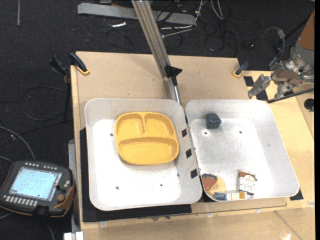

In [22]:
images = [trajectory['observation'][id] for id in range(trajectory['observation'].shape[0])]
images = [Image.fromarray(image.numpy()) for image in images]

display.Image(as_gif(images))

## Combination of multiple datasets

In [23]:
import tensorflow_datasets as tfds
robo_net_builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/robo_net/1.0.0/')

robo_net_builder_episodic_dataset = robo_net_builder.as_dataset(split='train[:10]')
episodes = list(iter(robo_net_builder_episodic_dataset))

In [24]:
# The following will create a trajectories of length 3.
trajectory_length = 3

robo_net_rlds_spec = RLDSSpec(
    observation_info=robo_net_builder.info.features['steps']['observation'],
    action_info=robo_net_builder.info.features['steps']['action'],
)

def robo_net_step_map_fn(step):
  transformed_step = {}
  transformed_step['observation'] = step['observation']['image']
  transformed_step['is_first'] = step['is_first']
  transformed_step['is_last'] = step['is_last']
  transformed_step['is_terminal'] = step['is_terminal']
  return transformed_step

robo_net_trajectory_transform = TrajectoryTransformBuilder(robo_net_rlds_spec,
                                                                          step_map_fn=robo_net_step_map_fn,
                                                                          pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)


def mt_opt_step_map_fn(step):
  transformed_step = {}
  transformed_step['observation'] = tf.cast(tf.image.resize(step['observation']['image'], [240, 320]), tf.uint8)  # Resize to be compatible with robo_net trajectory
  transformed_step['is_first'] = step['is_first']
  transformed_step['is_last'] = step['is_last']
  transformed_step['is_terminal'] = step['is_terminal']
  return transformed_step

mt_opt_trajectory_transform = TrajectoryTransformBuilder(mt_opt_rlds_spec,
                                                         step_map_fn=mt_opt_step_map_fn,
                                                         pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)

In [25]:
# Validate that the specs are equal
assert robo_net_trajectory_transform.expected_tensor_spec == mt_opt_trajectory_transform.expected_tensor_spec

In [26]:
# Create trajectory datasets for the two normalized representations:
robo_net_trajectory_dataset = robo_net_trajectory_transform.transform_episodic_rlds_dataset(robo_net_builder_episodic_dataset)
mt_opt_trajectory_dataset = mt_opt_trajectory_transform.transform_episodic_rlds_dataset(mt_opt_episodic_dataset)


In [27]:
combined_dataset = tf.data.Dataset.sample_from_datasets([robo_net_trajectory_dataset, mt_opt_trajectory_dataset])
combined_dataset = combined_dataset.batch(2)
combined_dataset_it = iter(combined_dataset)

In [28]:
example = next(combined_dataset_it)

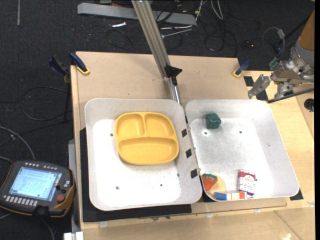

In [29]:
# First element of the batch returns a robot_net trajectory
Image.fromarray(example['observation'].numpy()[0][0])

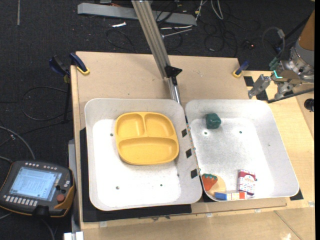

In [30]:
# Second element of the batch returns a mt_opt trajectory
Image.fromarray(example['observation'].numpy()[1][0])

# Available datasets and their sizes:

In [31]:
# Iterate over and make sure that a dataset can be created
for name in DATASETS:
  uri = dataset2path(name)
  b = tfds.builder_from_directory(builder_dir=uri)
  split = list(b.info.splits.keys())[0]
  b.as_dataset(split=split)
  print('Dataset %s has size %s'%(uri, b.info.dataset_size))


Dataset gs://gresearch/robotics/fractal20220817_data/0.1.0 has size 111.07 GiB


Dataset gs://gresearch/robotics/kuka/0.1.0 has size 778.02 GiB
Dataset gs://gresearch/robotics/bridge/0.1.0 has size 387.49 GiB
Dataset gs://gresearch/robotics/taco_play/0.1.0 has size 47.77 GiB
Dataset gs://gresearch/robotics/jaco_play/0.1.0 has size 9.24 GiB
Dataset gs://gresearch/robotics/berkeley_cable_routing/0.1.0 has size 4.67 GiB
Dataset gs://gresearch/robotics/roboturk/0.1.0 has size 45.39 GiB
Dataset gs://gresearch/robotics/nyu_door_opening_surprising_effectiveness/0.1.0 has size 7.12 GiB
Dataset gs://gresearch/robotics/viola/0.1.0 has size 10.40 GiB
Dataset gs://gresearch/robotics/berkeley_autolab_ur5/0.1.0 has size 76.39 GiB
Dataset gs://gresearch/robotics/toto/0.1.0 has size 127.66 GiB
Dataset gs://gresearch/robotics/language_table/0.0.1 has size 399.23 GiB
Dataset gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0 has size 2.80 GiB
Dataset gs://gresearch/robotics/stanford_kuka_multimodal_dataset_converted_externally_to_rlds/0.1.0 has size 31.98 GiB
Dataset gs://gre

In [32]:
from tensorflow_datasets.core.registered import DatasetNotFoundError

for name in DATASET_NAMES:
  try:
    b = tfds.builder(name)
    print(f"Dataset {name} is found in the TFDS catalog.")
  except DatasetNotFoundError:
    print(f"\033[91mDataset {name} is NOT found in the TFDS catalog.\033[0m")

Dataset fractal20220817_data is found in the TFDS catalog.
Dataset kuka is found in the TFDS catalog.
Dataset bridge is found in the TFDS catalog.
Dataset taco_play is found in the TFDS catalog.
Dataset jaco_play is found in the TFDS catalog.
Dataset berkeley_cable_routing is found in the TFDS catalog.
Dataset roboturk is found in the TFDS catalog.
Dataset nyu_door_opening_surprising_effectiveness is found in the TFDS catalog.
Dataset viola is found in the TFDS catalog.
Dataset berkeley_autolab_ur5 is found in the TFDS catalog.
Dataset toto is found in the TFDS catalog.
Dataset language_table is NOT found in the TFDS catalog.
Dataset columbia_cairlab_pusht_real is found in the TFDS catalog.
Dataset stanford_kuka_multimodal_dataset_converted_externally_to_rlds is found in the TFDS catalog.
Dataset nyu_rot_dataset_converted_externally_to_rlds is found in the TFDS catalog.
Dataset stanford_hydra_dataset_converted_externally_to_rlds is found in the TFDS catalog.
Dataset austin_buds_dataset